In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
from tensorflow.keras.layers import MaxPooling2D


## Loading Dataset

In [3]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_dir = '/kaggle/input/chest-x-ray-pneumonia/chest_xray/test'
val_dir = '/kaggle/input/chest-x-ray-pneumonia/chest_xray/val'
file_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/'

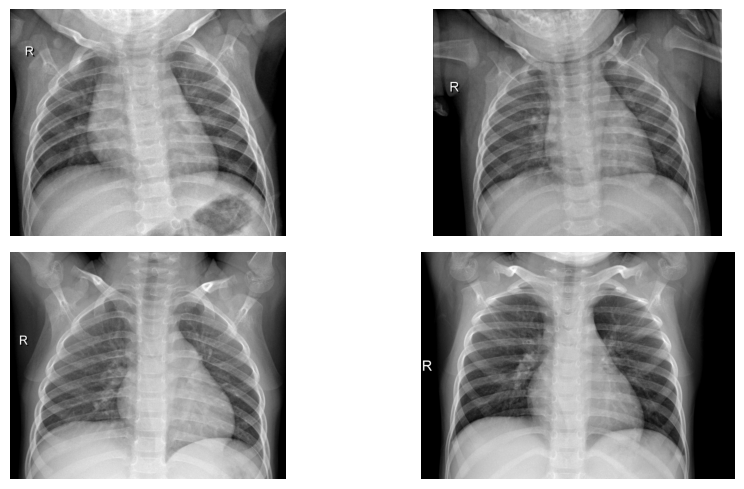

In [4]:
dir = os.listdir(file_path)

plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    image = plt.imread(os.path.join(file_path, dir[random.randrange(0, len(dir))]))
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()

## Preprocessing Data

In [5]:
train_data_gen = ImageDataGenerator(rescale=1/255)
folder = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/'
train_gen = train_data_gen.flow_from_directory(
    folder, target_size=(150,150),batch_size=500, class_mode='binary')


Found 5216 images belonging to 2 classes.


## AI Model

##### Several layers used for feature capture of the image data. MaxPooling layer to reduce spatial dimensions and ```relu``` activation was used to include non-linearity so the neural network learns from complex data patterns.

In [6]:
model = models.Sequential(
    [
        # Fist layer
        layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,3) ),
        layers.MaxPooling2D(),

        # Second convolution layer
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(),

        # Third convolution layer
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),

        # Fourth layer
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
        
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752272659.162501      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752272659.163277      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [7]:
model.fit(train_gen, steps_per_epoch=10, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1752272679.341557     112 service.cc:148] XLA service 0x7a05c4204860 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752272679.342325     112 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752272679.342347     112 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752272679.763214     112 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/10 ━━━━━━━━━━━━━━━━━━━━ 1:51 12s/step - accuracy: 0.7685 - loss: 0.6580

I0000 00:00:1752272686.242210     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 68s 6s/step - accuracy: 0.7505 - loss: 0.6929
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7400 - loss: 0.5873
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.7430 - loss: 0.5662
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7500 - loss: 0.5047
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.7617 - loss: 0.4865
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8120 - loss: 0.3653
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.8391 - loss: 0.3528
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8900 - loss: 0.2666
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.9109 - loss: 0.2228
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9167 - loss: 0.1972


### Evaluating model on Test Images

In [11]:
images = []
label_map = {'NORMAL': 0, 'PNEUMONIA': 1}
true_labels = []
pred_labels = []

test_data = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/'
categories = ['NORMAL', 'PNEUMONIA']
for category in categories:
    file_path = os.path.join(test_data, category)
    for file_name in os.listdir(file_path)[:40]:
        path = os.path.join(file_path, file_name)
        test_image= image.load_img(path, target_size=(150,150))
        img_array = image.img_to_array(test_image) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
    # print(img_array)
        pred = model.predict(img_array, verbose=0)
    
        pred_class = 1 if pred > 0.5 else 0
    
    # Storing results
        images.append(test_image)
        true_labels.append(label_map[category])
        pred_labels.append(pred_class)
len(images)

80

In [ ]:

images

### Predictions of images 

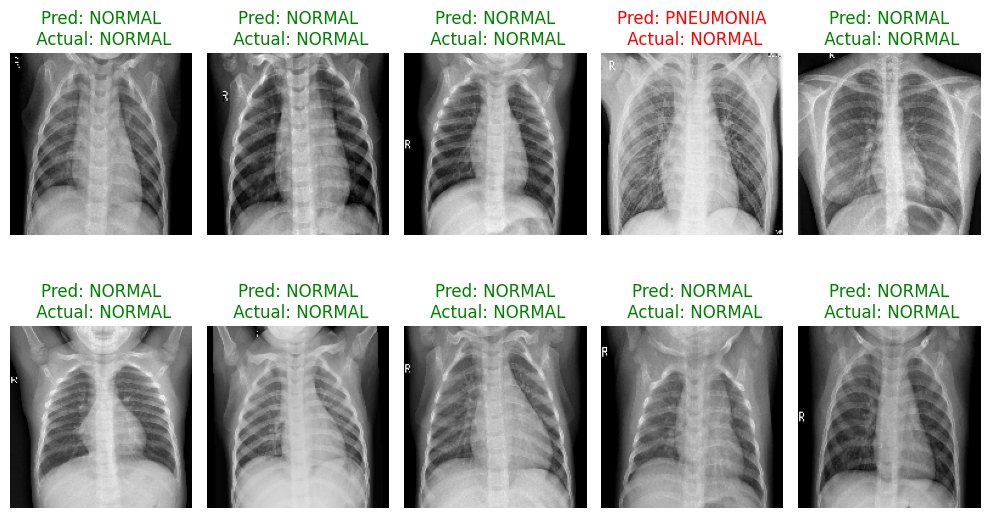

In [31]:
# num_col = 6
# num_rows = 2
import math
# n_images = len(images)
n_col = 5
# n_rows = math.ceil(n_images/n_col)

# num_images = num_col * num_rows
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, n_col, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    actual = 'PNEUMONIA'  if true_labels[i] == 1 else 'NORMAL'
    pred = 'PNEUMONIA' if pred_labels[i] == 1 else 'NORMAL'
    color = 'green' if actual == pred else 'red'
    plt.title(f'Pred: {pred}\n Actual: {actual}', color=color)
plt.tight_layout()
plt.show()

In [34]:
model.save('pneumonia classification.h5')